# **Analiza wyborów zakupowych klientów**

# **Część I. Opis danych**

1. Opis zbioru danych

Wykorzystany w analizie zbiór danych zawiera informacje na temat zachowań zakupowych klientów. Obejmuje informacje demograficzne, zwyczaje zakupowe i inne istotne funkcje opisane poniżej.

**Age:** Wiek klienta (w latach)

**Gender:** płeć klienta (0: mężczyzna, 1: kobieta)

**Annual Income:** Roczny dochód klienta (w dolarach)

**Number of Purchases:** Całkowita liczba zakupów dokonanych przez klienta (w ciągu 1 roku)

**Product Category:** Kategoria kupowanego produktu (0: Elektronika, 1: Odzież, 2: Artykuły gospodarstwa domowego, 3: Uroda, 4: Sport)

**Time Spent on Website:** Czas spędzony przez klienta na stronie (w minutach, sumarycznie w ciągu roku)

**Loyalty Program:** Czy klient jest członkiem programu lojalnościowego (0: Nie, 1: Tak)

**Discounts Availed:** Liczba rabatów, z których skorzystał klient (zakres: 0-5)

**PurchaseStatus** (zmienna docelowa): Prawdopodobieństwo, że klient dokona zakupu (0: Nie, 1: Tak)

2. Cel analizy

Badania poniższych danych przeprowadzono celem lepszego zrozumienia potrzeb zakupowych klientów, a także sprawdzenia co ma największy wpływ na dokonywane przez klientów wybory.

# **Część II. Przygotowanie danych do analizy**

1. Import niezbędnych bibliotek

In [1]:
from google.cloud import bigquery

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Wczytanie pliku z danymi

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Project1_Customer_preferences/customer_purchase_data.csv', sep=',')

3. Wczytanie pierwszych 5 wersów w celu sprawdzenia czy dane zaczytały się poprawnie

In [4]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


4. Statystyki opisowe dnych

In [5]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


5. Sprawdzenie występowania ewentualnych duplikatów



In [6]:
df[df.duplicated()]

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
243,57,1,79069.053493,8,4,43.221622,0,2,0
271,43,0,101042.774561,14,4,1.596751,0,5,0
299,65,1,55499.205296,20,4,12.778100,0,5,0
304,50,0,41425.926045,6,0,29.865093,1,2,0
306,56,1,48679.553852,17,1,10.110530,0,3,0
...,...,...,...,...,...,...,...,...,...
1461,67,1,110466.885362,17,0,43.108669,0,1,0
1484,68,0,80311.223269,14,2,19.080098,0,3,0
1485,21,1,120794.999552,10,0,7.630770,0,2,0
1492,63,0,71874.591294,10,2,43.546243,0,1,0


6. Usunięcie duplikatów

In [7]:
df_cleaned = df.drop_duplicates()

7. Sprawdzenie występowania pustych pól w tabeli

In [8]:
df_cleaned.isnull().any()

Age                   False
Gender                False
AnnualIncome          False
NumberOfPurchases     False
ProductCategory       False
TimeSpentOnWebsite    False
LoyaltyProgram        False
DiscountsAvailed      False
PurchaseStatus        False
dtype: bool

8. Dodanie kolumny Client_ID, której wartości są równe wartościom kolumny index. Przesunięcie kolumny na początek

In [9]:
df_cleaned['Client_ID'] = df_cleaned.index

df_cleaned = df_cleaned[['Client_ID'] + [col for col in df_cleaned.columns if col != 'Client_ID']]

<ipython-input-9-95d53b0e0e62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Client_ID'] = df_cleaned.index


9. Podzielenie tabeli danych na dwie części, w celu normalizacji danych. Dzięki temu zabiegowi uzyskujemy dwa zestawienia - jedno dotyczące klienta, a drugie zamawianych produktów i sklepu

In [10]:
df_client = df_cleaned[['Client_ID', 'Age', 'Gender', 'AnnualIncome', 'LoyaltyProgram']]
df_purchases = df_cleaned[['Client_ID', 'NumberOfPurchases', 'ProductCategory', 'DiscountsAvailed', 'PurchaseStatus', 'TimeSpentOnWebsite']]

In [11]:
df_client.head()

,Client_ID,Age,Gender,AnnualIncome,LoyaltyProgram
0,0,40,1,66120.267939,0
1,1,20,1,23579.773583,0
2,2,27,1,127821.306432,1
3,3,24,1,137798.623120,0
4,4,31,1,99300.964220,0


In [12]:
df_purchases.head()

,Client_ID,NumberOfPurchases,ProductCategory,DiscountsAvailed,PurchaseStatus,TimeSpentOnWebsite
0,0,8,0,5,1,30.568601
1,1,4,2,5,0,38.240097
2,2,11,2,0,1,31.633212
3,3,19,3,4,1,46.167059
4,4,19,1,0,1,19.823592


10. Utworzenie konta na Google Cloud Console, założenie Service Account i wygenerowanie nowego klucza json w celu korzystania z BigQuery

In [13]:
client = bigquery.Client.from_service_account_json('/content/drive/MyDrive/Project1_Customer_preferences/nodal-subset-428419-s3-5eb70d85c5ba.json')

11. Utworzenie tabel w Google Cloud oraz załadowanie do nich danych z Data Frame

In [14]:
table_id_client = 'nodal-subset-428419-s3.dataset1.client'
table_id_purchases = 'nodal-subset-428419-s3.dataset1.purchases'

In [15]:
job_config_client = bigquery.LoadJobConfig(
    write_disposition=bigquery.WriteDisposition.WRITE_TRUNCATE
)
job_config_purchases = bigquery.LoadJobConfig(
    write_disposition=bigquery.WriteDisposition.WRITE_TRUNCATE
)
job_client = client.load_table_from_dataframe(df_client, table_id_client, job_config=job_config_client)
job_client.result()

job_purchases = client.load_table_from_dataframe(df_purchases, table_id_purchases, job_config=job_config_purchases)
job_purchases.result()

LoadJob<project=nodal-subset-428419-s3, location=EU, id=278eb103-b0e3-40ff-abca-43df81506209>

# **Część III. Analiza danych**



Sprawdzenie korelacji między zmiennymi

<Axes: >

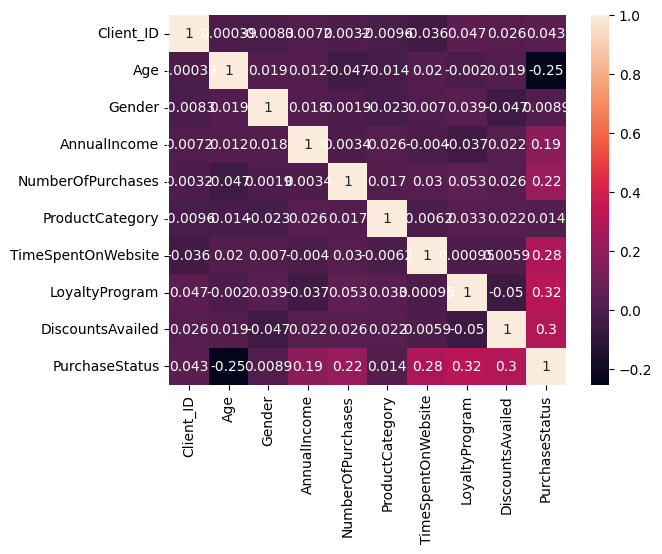

In [16]:
sns.heatmap(df_cleaned.corr(), annot=True)

1. Suma zamówień względem posiadanego programu lolajnościowego. Sprawdzenie czy fakt jego posiadania wpływał na liczbę zamówień oraz ile klientów należało do programu lojalnościowego

In [17]:
query = """
SELECT sum(p.NumberOfPurchases) as Suma_zamowien, c.LoyaltyProgram
FROM `nodal-subset-428419-s3.dataset1.client` c
JOIN `nodal-subset-428419-s3.dataset1.purchases` p
ON c.Client_ID = p.Client_ID
GROUP BY c.LoyaltyProgram
"""

# Wykonanie zapytania i załadowanie wyniku do DataFrame
df1 = client.query(query).to_dataframe()
df1


,Suma_zamowien,LoyaltyProgram
0,9556,0
1,5086,1


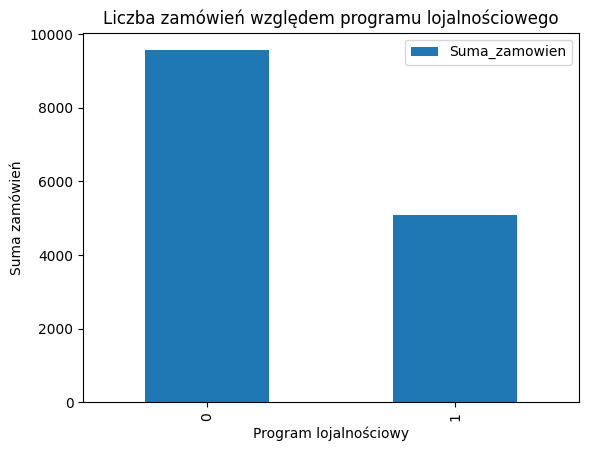

In [18]:
df1.plot(kind='bar', x='LoyaltyProgram', y='Suma_zamowien')

plt.title('Liczba zamówień względem programu lojalnościowego') #do poprawy tytuł
plt.xlabel('Program lojalnościowy')
plt.ylabel('Suma zamówień')
plt.show()

In [19]:
query = """
SELECT sum(c.Client_ID) as Liczba_klientow, c.LoyaltyProgram
FROM `nodal-subset-428419-s3.dataset1.client` c
GROUP BY c.LoyaltyProgram
"""

# Wykonanie zapytania i załadowanie wyniku do DataFrame
df2 = client.query(query).to_dataframe()
df2

,Liczba_klientow,LoyaltyProgram
0,663254,0
1,351924,1


2. Analiza wyborów zakupowych według płci

In [20]:
query = """
SELECT c.Gender, p.ProductCategory, SUM(p.NumberOfPurchases) AS TotalPurchases
FROM `nodal-subset-428419-s3.dataset1.client` c
JOIN `nodal-subset-428419-s3.dataset1.purchases` p
ON c.Client_ID = p.Client_ID
GROUP BY
    c.Gender,
    p.ProductCategory
ORDER BY
    c.Gender,
    TotalPurchases DESC;
    """

# Wykonanie zapytania i załadowanie wyniku do DataFrame
df3 = client.query(query).to_dataframe()
df3

,Gender,ProductCategory,TotalPurchases
0,0,1,1693
1,0,2,1516
2,0,3,1437
3,0,4,1435
4,0,0,1211
5,1,4,1617
6,1,1,1538
7,1,0,1504
8,1,3,1364
9,1,2,1327


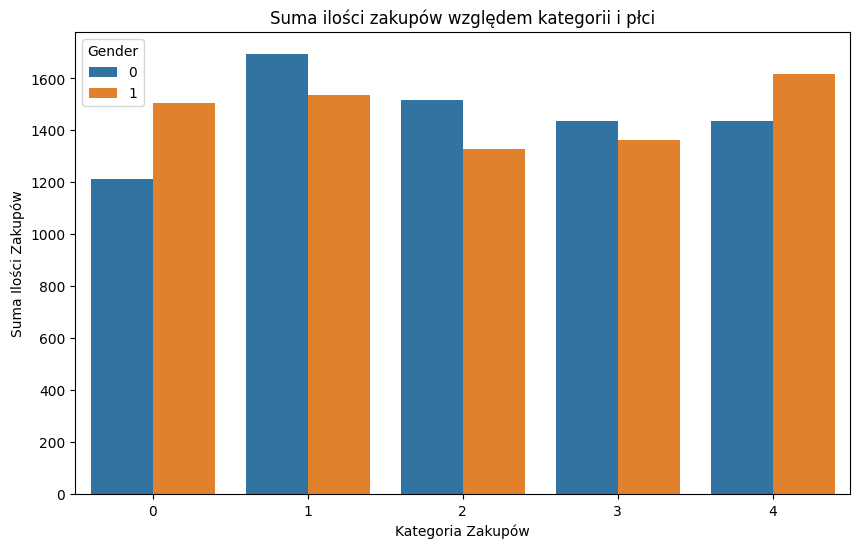

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductCategory', y='TotalPurchases', hue='Gender', data=df3)

# Dodanie tytułu i etykiet osi
plt.title('Suma ilości zakupów względem kategorii i płci')
plt.xlabel('Kategoria Zakupów')
plt.ylabel('Suma Ilości Zakupów')

# Wyświetlenie wykresu
plt.show()

In [22]:
query = """
SELECT c.Gender, SUM(c.client_ID) as Liczba_klientow
FROM `nodal-subset-428419-s3.dataset1.client` c
GROUP BY
    c.Gender
    """
  # Wykonanie zapytania i załadowanie wyniku do DataFrame
df4 = client.query(query).to_dataframe()
df4

,Gender,Liczba_klientow
0,0,508638
1,1,506540


3. Sprawdzenie wpływu ilości spędzonego na stronie sklepu czasu na ilość zakupów

In [23]:
query = """
SELECT ROUND(p.TimeSpentOnWebsite) as RoundedTimeSpend, SUM(p.NumberOfPurchases) AS NumberOfPurchases
FROM `nodal-subset-428419-s3.dataset1.purchases` p
GROUP BY
    RoundedTimeSpend
ORDER BY
    RoundedTimeSpend DESC, NumberOfPurchases DESC;
    """

# Wykonanie zapytania i załadowanie wyniku do DataFrame
df5 = client.query(query).to_dataframe()
df5.head()

,RoundedTimeSpend,NumberOfPurchases
0,60.0,172
1,59.0,164
2,58.0,306
3,57.0,266
4,56.0,302


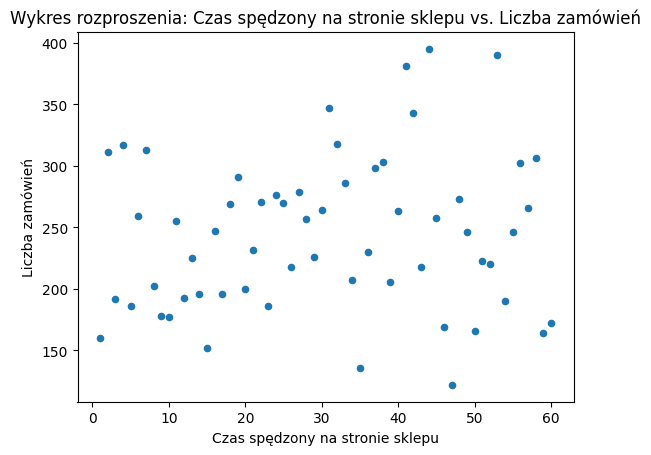

In [24]:
df5.plot(kind='scatter', x='RoundedTimeSpend', y='NumberOfPurchases')

# Dodanie tytułu i etykiet osi
plt.title('Wykres rozproszenia: Czas spędzony na stronie sklepu vs. Liczba zamówień')
plt.xlabel('Czas spędzony na stronie sklepu')
plt.ylabel('Liczba zamówień')

# Wyświetlenie wykresu
plt.show()

4. Klienci jakiej płci chętniej korzystali ze zniżek. Czy ilość zniżek wpływała na liczbę zakupów

In [25]:
query = """
SELECT c.Gender, p.DiscountsAvailed, count(p.DiscountsAvailed) as DiscountAvailedCount
FROM `nodal-subset-428419-s3.dataset1.client` c
JOIN `nodal-subset-428419-s3.dataset1.purchases` p
ON c.Client_ID = p.Client_ID
GROUP BY
    c.Gender,
    p.DiscountsAvailed
ORDER BY
    p.DiscountsAvailed DESC;
    """

# Wykonanie zapytania i załadowanie wyniku do DataFrame
df6 = client.query(query).to_dataframe()
df6

,Gender,DiscountsAvailed,DiscountAvailedCount
0,0,5,127
1,1,5,120
2,0,4,133
3,1,4,116
4,0,3,119
5,1,3,127
6,0,2,115
7,1,2,102
8,0,1,107
9,1,1,112


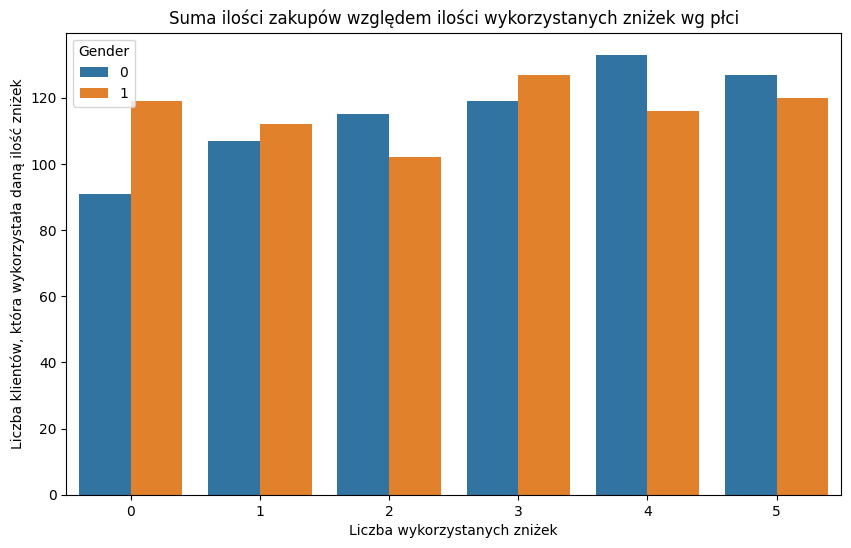

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='DiscountsAvailed', y='DiscountAvailedCount', hue='Gender', data=df6)

# Dodanie tytułu i etykiet osi
plt.title('Suma ilości zakupów względem ilości wykorzystanych zniżek wg płci')
plt.xlabel('Liczba wykorzystanych zniżek')
plt.ylabel('Liczba klientów, która wykorzystała daną ilość zniżek')

# Wyświetlenie wykresu
plt.show()

In [27]:
query = """
SELECT p.DiscountsAvailed, COUNT(p.DiscountsAvailed) as DisCount,  SUM(p.NumberOfPurchases) as Suma_zamowien,
FROM `nodal-subset-428419-s3.dataset1.purchases` p
GROUP BY
    p.DiscountsAvailed;


    """
  # Wykonanie zapytania i załadowanie wyniku do DataFrame
df7 = client.query(query).to_dataframe()
df7

,DiscountsAvailed,DisCount,Suma_zamowien
0,0,210,2194
1,1,219,2331
2,2,217,2230
3,3,246,2472
4,4,249,2708
5,5,247,2707


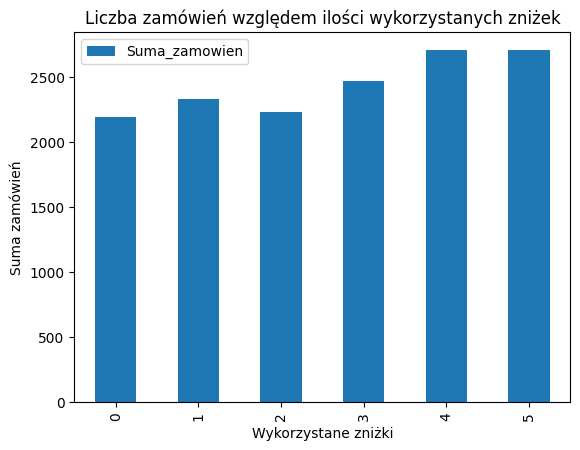

In [28]:
df7.plot(kind='bar', x='DiscountsAvailed', y='Suma_zamowien')

plt.title('Liczba zamówień względem ilości wykorzystanych zniżek')
plt.xlabel('Wykorzystane zniżki')
plt.ylabel('Suma zamówień')
plt.show()

In [29]:
# Sprawdzenie czy uzyskano prawidłową liczbę sumaryczną zamówień. Ilość zgodna z obliczeniami

query = """
SELECT SUM(p.NumberOfPurchases) as Suma_zamowien
FROM `nodal-subset-428419-s3.dataset1.purchases` p;

"""

# Wykonanie zapytania i załadowanie wyniku do DataFrame
df8 = client.query(query).to_dataframe()
df8

,Suma_zamowien
0,14642


5. Sprawdzenie wysokości zarobków względem płci oraz klienci, której płci wydali więcej pieniędzy na zakupy

In [30]:
query = """
SELECT c.Gender, SUM(c.AnnualIncome) as TotalIncome, SUM(p.NumberOfPurchases) as TotalPurchases
FROM `nodal-subset-428419-s3.dataset1.client` c
JOIN `nodal-subset-428419-s3.dataset1.purchases` p
ON c.Client_ID = p.Client_ID
GROUP BY
    c.Gender;
    """

# Wykonanie zapytania i załadowanie wyniku do DataFrame
df9 = client.query(query).to_dataframe()
df9

,Gender,TotalIncome,TotalPurchases
0,0,5.815137e+07,7292
1,1,5.941090e+07,7350


# **Część IV. Wnioski z analizy**

Poniżej zebrano wnioski uzyskane na bazie dokonanej wcześniej analizy danych zakupowych klientów:

1. Suma zamówień jest dwukrotnie większa w przypadku osób, które nie należały do programu lojalnościowego. Jest to jednak pozpośrednio skorelowane z dwukrotnie większą liczbą osób, które do tego programu nie należały. Sam fakt przynależności do programu, nie wpłynął w tym wypadku bezpośrenio na zwiększenie liczby kupowanych produktów.

2. Liczba klientów obu płci jest bardzo zbliżona (kobiety stanowią 50.2%, a mężczyźni 49.8%). Z analizy wyborów zakupowych obu płci wynika, że kobiety częściej dokonywały zakupów z kategorii elektroniki oraz sportu, natomiast mężczyźni częściej decydowali się na zakup artykułów gospodarstwa domowego. W pozostałych kategoriach - odzież oraz uroda, różnice były marginalne. Obie płcie sięgały po produkty z tych kategorii równie często.

3. Czas spędzony przez klientów na stronie sklepu, nie miał wpływu na wysokość dokonywanych przez nich zakupów.

4. Płeć nie miała większego wpływu na korzystanie ze zniżek. Liczby klientów korzystających z danej liczby zniżek była do siebie bardzo zbliżona dla obu płci. Większa różnica została zaobserwowana przy braku korzystania ze zniżek. Tu kobiety stanowiły 57.5%, a więc 15% więcej niż mężczyźni.

5. Suma rocznych dochodów kobiet była minimalnie (o 1.4%) wyższa niż suma rocznych dochodów u mężczyzn. Podobna różnica wystąpiła w przypadku ilości dokonywanych zakupów. Kobiety zamówiły o 1% więcej produktów od mężczyzn.

6. Po analizie korelacji poszczególnych parametrów względem siebie przy pomocy heat mapy stwierdzono, że żaden z parametrów nie wpływa na inne w większym stopniu.

7. W trakcie analizy danych zakupowych klientów zaobserwowano, że wszystkie analizowane zmienne są niezwykle równomiernie rozłożone. Wynika to prawdopodobnie z faktu, że dane zostały stworzone syntetycznie, co może wpływać na wiarygodność wniosków i ograniczać ich zastosowanie w rzeczywistych strategiach sprzedażowych i marketingowych.
Syntetyczność danych sprawia, że wszelkie identyfikowane trendy mogą być wynikiem sztucznego konstruktu, a nie rzeczywistych zachowań klientów. W rzeczywistości dane są zazwyczaj bardziej zróżnicowane i nieprzewidywalne, co pozwala na bardziej dogłębną analizę i lepsze zrozumienie złożonych wzorców zachowań konsumentów.
Pomimo tych ograniczeń, analiza ta służy jako ćwiczenie w technikach analitycznych i może być użyteczna jako podstawa do bardziej zaawansowanych i szczegółowych badań.